<a href="https://colab.research.google.com/github/LucasHenrique-dev/esteganografia-PDI/blob/main/SSB/Projeto_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2, os
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import structural_similarity as ssim
from scipy.stats import chisquare
import random
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def load_single_image(path):
  image = Image.open(path).convert('L')  # Convert to grayscale
  image_array = np.array(image)
  return image_array

In [3]:
def display_single_image(image):
  plt.figure(figsize=(5, 5))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

In [4]:
def plot_single_histogram(image):
    plt.figure(figsize=(15, 5))
    if image.ndim == 2:  # Grayscale image
      sns.histplot(image.ravel(), bins=256, kde=True, color='gray', label='Grayscale')
    else:  # RGB image
      for j, color in enumerate(['r', 'g', 'b']):
        sns.histplot(image[:, :, j].ravel(), bins=256, kde=True, color=color, label=f'Channel {color.upper()}')

    plt.title(f'Pixel Value Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [5]:
def compare_images(images, titles=[], gray=True):
  num_images = len(images)

  if num_images == 2:
      fig, axs = plt.subplots(1, 2, figsize=(10, 5))
  elif num_images == 3:
      fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  for i in range(num_images):
      if gray:
          axs[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
      else:
          axs[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))

      # Definir o título da imagem, se fornecido
      if i < len(titles):
          axs[i].set_title(titles[i])

      axs[i].axis('off')

  # Mostrar a figura
  plt.show()

In [6]:
def compare_histograms(images, titles=[], gray=True):
  num_images = len(images)

  if num_images == 2:
      fig, axs = plt.subplots(1, 3, figsize=(20, 5))
      hist1, bins1 = np.histogram(images[0], bins=256, range=(0, 256))
      hist2, bins2 = np.histogram(images[1], bins=256, range=(0, 256))
      hist_diff = hist2 - hist1
      bin_centers = (bins1[:-1] + bins1[1:]) / 2
  elif num_images == 3:
      fig, axs = plt.subplots(1, 4, figsize=(15, 5))

  for i in range(num_images):
    if images[i].ndim == 2:  # Grayscale image
      sns.histplot(images[i].ravel(), bins=256, kde=True, color='gray', label='Grayscale', ax=axs[i])
    else:  # RGB image
      for j, color in enumerate(['r', 'g', 'b']):
        sns.histplot(images[i][:, :, j].ravel(), bins=256, kde=True, color=color, label=f'Channel {color.upper()}', ax=axs[i])

    # Definir o título da imagem, se fornecido
    if i < len(titles):
        axs[i].set_title(titles[i])

    #axs[i].axis('off')

  if num_images == 2:
    axs[2].bar(bin_centers, hist_diff, width=(bins1[1] - bins1[0]), color='green')
    axs[2].set_title('Difference in Histograms (Modified - Original)')
    axs[2].set_xlabel('Value')
    axs[2].set_ylabel('Difference in Count')
    axs[2].set_ylim([0, 50])

  # Mostrar a figura
  plt.show()

In [7]:
def load_images(directory, num_images=1):
    images = []
    count = 0
    for filename in os.listdir(directory):
        #if count >= num_images:
        #    break
        if filename.endswith((".png", ".jpg", ".jpeg", ".bmp", ".webp")):
            img = cv2.imread(os.path.join(directory, filename))
            if img is not None:
                images.append((directory, img))
                count += 1
    return images

In [8]:
def display_sample_images(images, n=1):
    plt.figure(figsize=(5, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(cv2.cvtColor(images[i][1], cv2.COLOR_BGR2RGB))
        plt.title(images[i][0].split(os.path.sep)[-1])  # Display subfolder name
        plt.axis('off')
    plt.show()

In [9]:
path = '/content'
images = load_images(path)

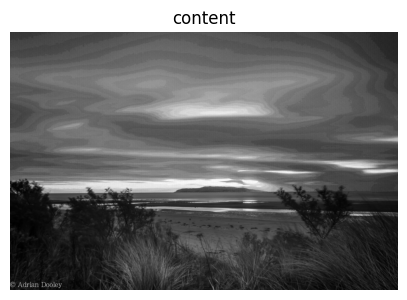

In [10]:
display_sample_images(images)

In [11]:
def convert_gray_scale(images):
  imgs = []
  for dir, img in images:
    imgs.append((dir, cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))
  return imgs

In [12]:
images_gray = convert_gray_scale(images)

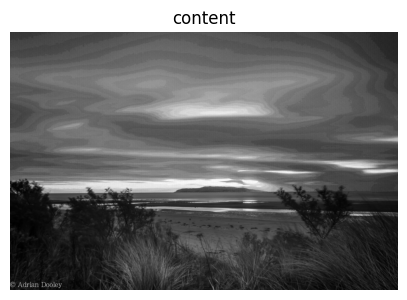

In [13]:
display_sample_images(images_gray)

In [14]:
def plot_pixel_histograms(images, num_histograms=10):
    for i in range(min(num_histograms, len(images))):
        _, img = images[i]
        plt.figure(figsize=(15, 5))

        if img.ndim == 2:  # Grayscale image
            sns.histplot(img.ravel(), bins=256, kde=True, color='gray', label='Grayscale')
        else:  # RGB image
            for j, color in enumerate(['r', 'g', 'b']):
                sns.histplot(img[:, :, j].ravel(), bins=256, kde=True, color=color, label=f'Channel {color.upper()}')

        plt.title(f'Pixel Value Distribution for Image {i + 1}')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

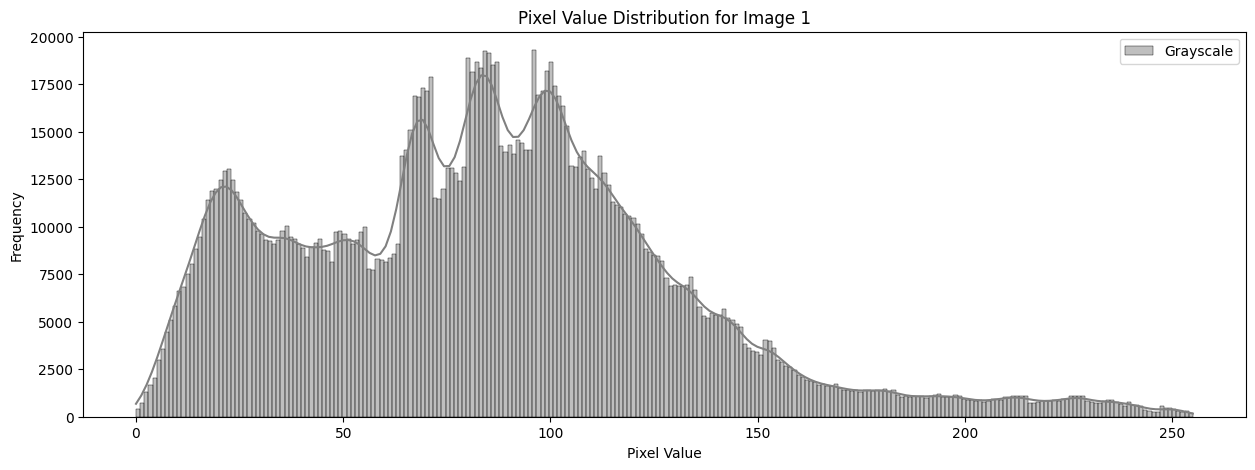

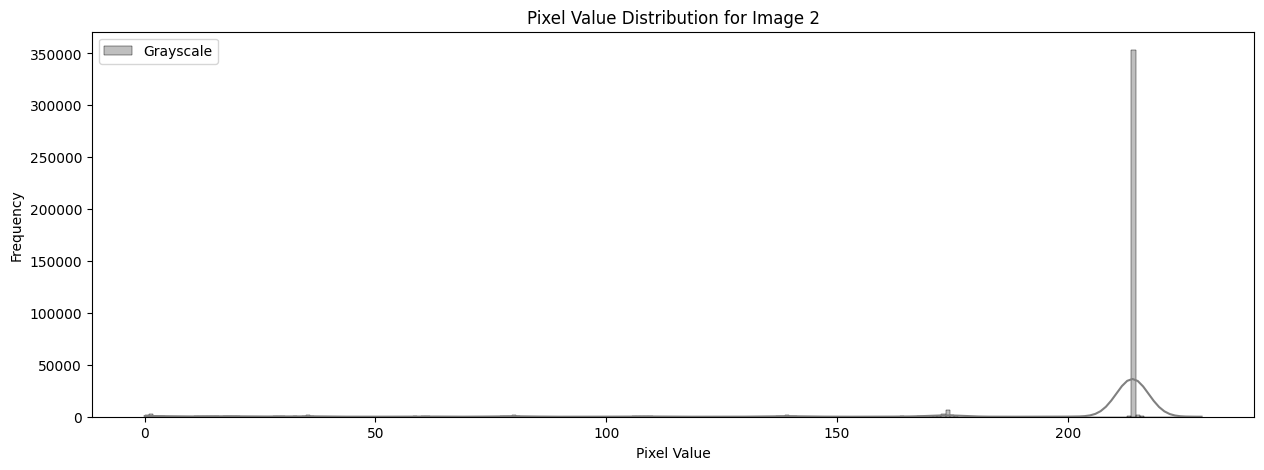

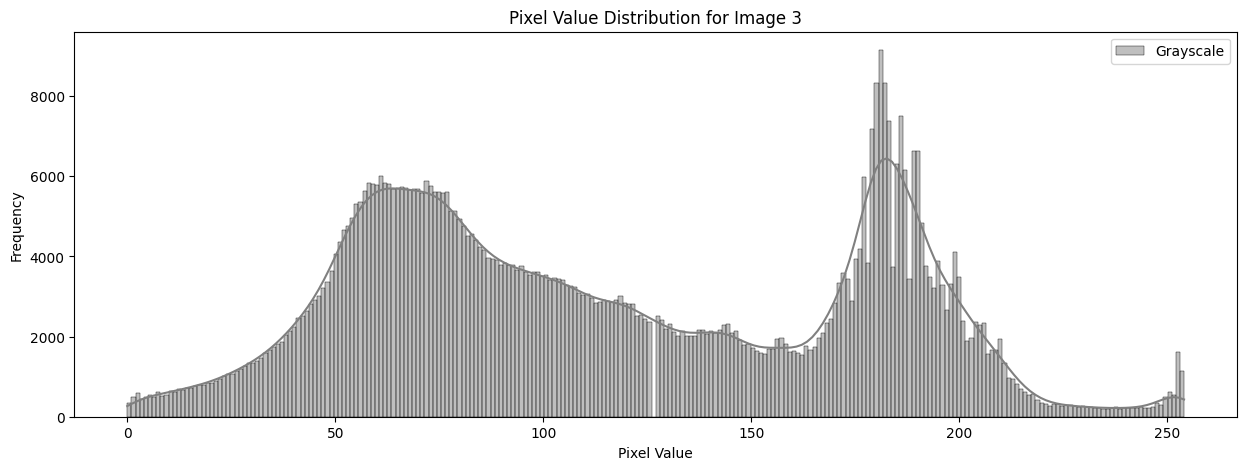

In [15]:
plot_pixel_histograms(images_gray)

In [16]:
def message_to_binary(message):
    binary_message = ''.join(format(ord(char), '08b') for char in message)
    print('Lenght: ' + str(len(binary_message)))
    return binary_message

message = "Test of a long message https://www.researchgate.net/publication/286069521_An_active_steganographic_scheme_using_SSB"
binary_message = message_to_binary(message)
print(binary_message)

Lenght: 920
01010100011001010111001101110100001000000110111101100110001000000110000100100000011011000110111101101110011001110010000001101101011001010111001101110011011000010110011101100101001000000110100001110100011101000111000001110011001110100010111100101111011101110111011101110111001011100111001001100101011100110110010101100001011100100110001101101000011001110110000101110100011001010010111001101110011001010111010000101111011100000111010101100010011011000110100101100011011000010111010001101001011011110110111000101111001100100011100000110110001100000011011000111001001101010011001000110001010111110100000101101110010111110110000101100011011101000110100101110110011001010101111101110011011101000110010101100111011000010110111001101111011001110111001001100001011100000110100001101001011000110101111101110011011000110110100001100101011011010110010101011111011101010111001101101001011011100110011101011111010100110101001101000010


In [17]:
def binary_to_message(binary_str):
    # Split the binary string into chunks of 8 bits
    bytes_list = [binary_str[i:i+8] for i in range(0, len(binary_str), 8)]

    # Convert each chunk to the corresponding ASCII character
    characters = [chr(int(byte, 2)) for byte in bytes_list]

    # Combine the characters to form the original message
    message = ''.join(characters)
    return message

# Example usage
binary_str = binary_message
message = binary_to_message(binary_str)
print(message)

Test of a long message https://www.researchgate.net/publication/286069521_An_active_steganographic_scheme_using_SSB


# SSB4

In [18]:
def modify_bit(value, bit_position, bit_value):
    mask = 1 << bit_position
    value &= ~mask  # Clear the bit at bit_position
    if bit_value:
        value |= mask  # Set the bit if bit_value is 1
    return value

def embed_message(image_path, message, password):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    pixels = np.array(image)
    h, w = pixels.shape
    l_c = h * w
    l_m = len(message)
    E_l = l_c // l_m

    # Divide the image into regions and calculate central pixels
    regions = [(i * E_l, (i + 1) * E_l) for i in range(l_m)]

    # Seed the PRNG with the password
    random.seed(password)
    random_regions = random.sample(regions, l_m)
    #print(random_regions)

    for i, bit in enumerate(message):
        start, end = random_regions[i]
        central_pixel_index = (start + end) // 2
        y, x = divmod(central_pixel_index, w)

        # Modify the 4th bit of the central pixel
        original_value = pixels[y, x]
        new_value = modify_bit(original_value, 4, int(bit))
        pixels[y, x] = new_value

    # Save the modified image
    modified_image = Image.fromarray(pixels)
    modified_image.save('modified_' + image_path.split('/')[-1])
    return pixels

# Example usage
message = binary_message
password = "DQqpiafIpMHsydX"
pixels = embed_message('/content/test_test.png', message, password)


In [19]:
def extract_bit(value, bit_position):
    return (value >> bit_position) & 1

def decrypt_message(image_path, password, message_length, pixels_):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    pixels = np.array(image)
    print(np.array_equal(pixels, pixels_))
    print(pixels.shape)
    h, w = pixels.shape
    l_c = h * w
    l_m = message_length
    E_l = l_c // l_m

    # Divide the image into regions and calculate central pixels
    regions = [(i * E_l, (i + 1) * E_l) for i in range(l_m)]

    # Seed the PRNG with the password
    random.seed(password)
    random_regions = random.sample(regions, l_m)
    #print(random_regions)

    extracted_bits = []
    for start, end in random_regions:
        central_pixel_index = (start + end) // 2
        y, x = divmod(central_pixel_index, w)

        # Extract the 4th bit of the central pixel
        pixel_value = pixels[y, x]
        extracted_bit = extract_bit(pixel_value, 4)
        extracted_bits.append(str(extracted_bit))

    # Combine extracted bits to reconstruct the message
    message = ''.join(extracted_bits)
    return message

# Example usage
password = "DQqpiafIpMHsydX"
message_length = len(binary_message)  # Length of the original message in bits
extracted_message = decrypt_message('/content/modified_test_test.png', password, message_length, pixels)
converted_message = binary_to_message(extracted_message)
print("Extracted Message (binary):", extracted_message)
print("Original Message: ", converted_message)

True
(640, 640)
Extracted Message (binary): 01010100011001010111001101110100001000000110111101100110001000000110000100100000011011000110111101101110011001110010000001101101011001010111001101110011011000010110011101100101001000000110100001110100011101000111000001110011001110100010111100101111011101110111011101110111001011100111001001100101011100110110010101100001011100100110001101101000011001110110000101110100011001010010111001101110011001010111010000101111011100000111010101100010011011000110100101100011011000010111010001101001011011110110111000101111001100100011100000110110001100000011011000111001001101010011001000110001010111110100000101101110010111110110000101100011011101000110100101110110011001010101111101110011011101000110010101100111011000010110111001101111011001110111001001100001011100000110100001101001011000110101111101110011011000110110100001100101011011010110010101011111011101010111001101101001011011100110011101011111010100110101001101000010
Original Message:  Test of a long m

In [20]:
test_image = load_single_image('/content/test_test.png')

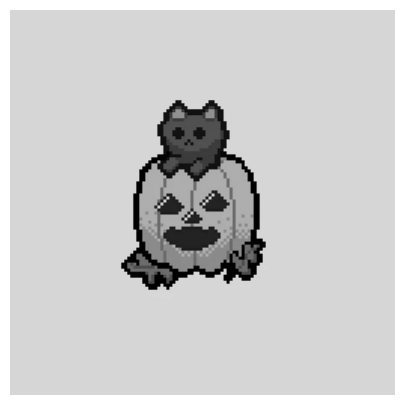

In [21]:
display_single_image(test_image)

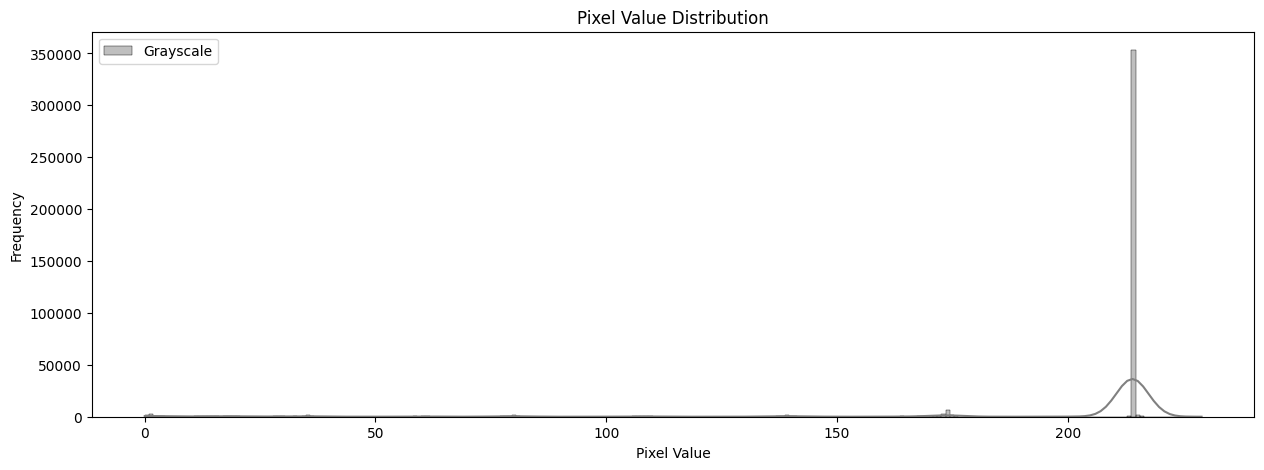

In [22]:
plot_single_histogram(test_image)

In [23]:
modified_image = load_single_image('/content/modified_test_test.png')

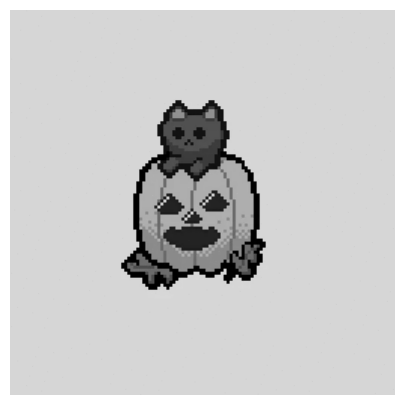

In [24]:
display_single_image(modified_image)

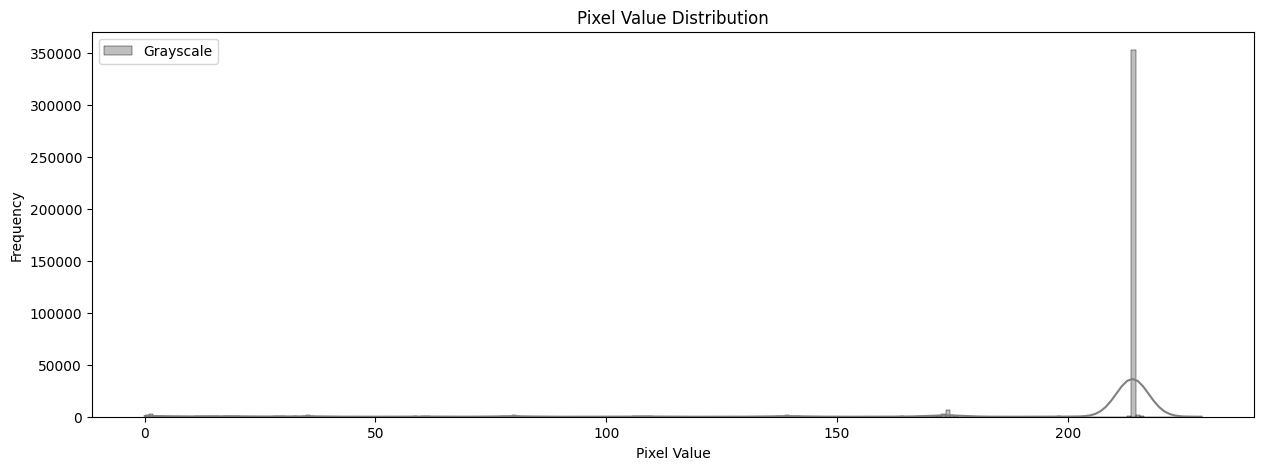

In [25]:
plot_single_histogram(modified_image)

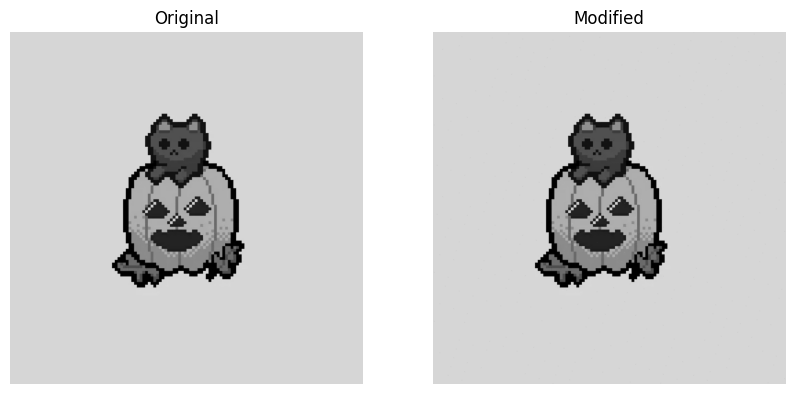

In [26]:
compare_images([test_image, modified_image], titles=['Original', 'Modified'])

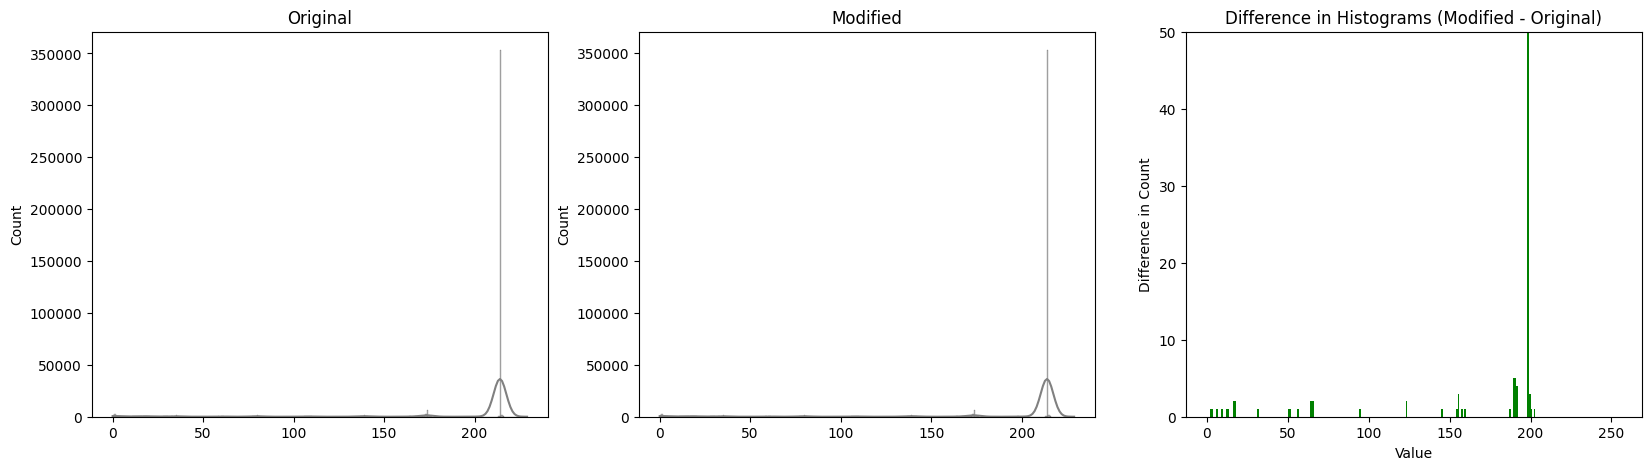

In [27]:
compare_histograms([test_image, modified_image], titles=['Original', 'Modified'])

In [29]:
def frequency_domain_analysis_single(image):
  if image.ndim == 3:
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  else:
      gray = image
  f = np.fft.fft2(gray)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20 * np.log(np.abs(fshift))

  plt.figure(figsize=(12, 6))
  plt.subplot(121), plt.imshow(gray, cmap='gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

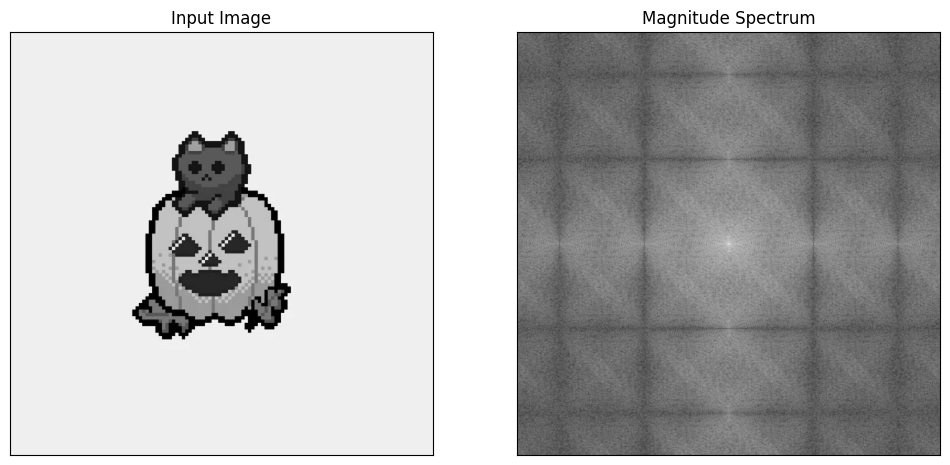

In [30]:
frequency_domain_analysis_single(test_image)

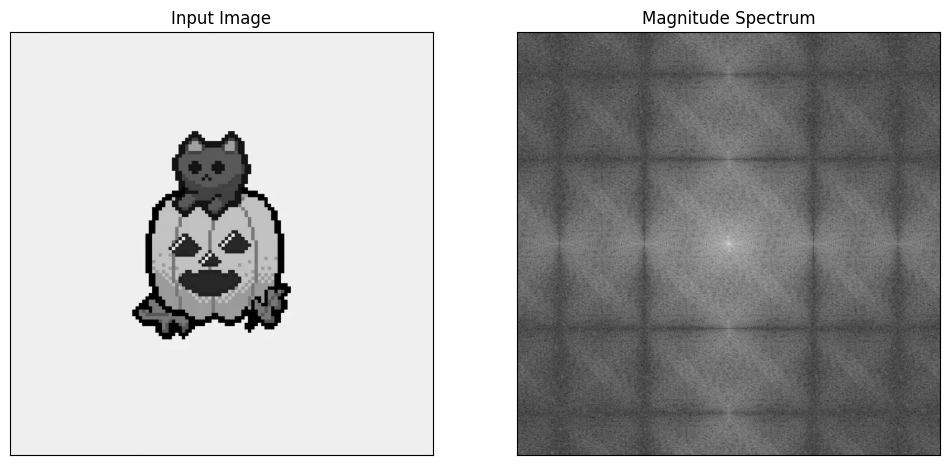

In [31]:
frequency_domain_analysis_single(modified_image)

In [32]:
# Function to calculate PSNR
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

In [33]:
def get_calculation_psnr_ssim(original, noisy):
  psnr_value = calculate_psnr(original, noisy)
  print(f'PSNR: {psnr_value} dB')

  # Calculate SSIM
  ssim_value, ssim_map = ssim(original, noisy, full=True)
  print(f'SSIM: {ssim_value}')

  # Display images and SSIM map
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 3, 1)
  plt.title('Original Image')
  plt.imshow(original, cmap='gray')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.title('Modified Image')
  plt.imshow(noisy, cmap='gray')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.title('SSIM Map')
  plt.imshow(ssim_map, cmap='gray')
  plt.axis('off')

  plt.show()

PSNR: inf dB
SSIM: 1.0


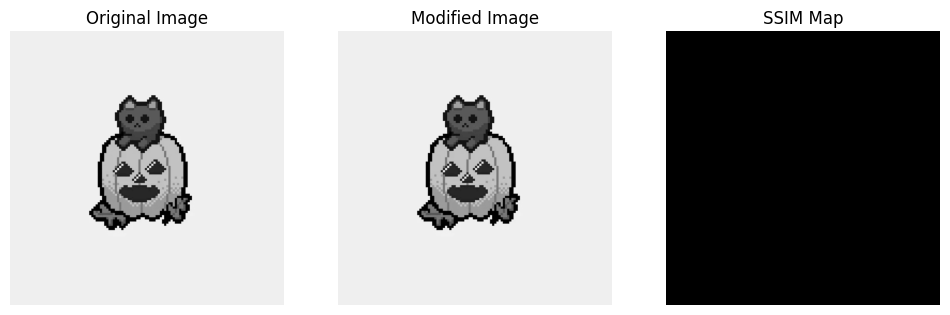

PSNR: inf dB
SSIM: 0.9961576201367625


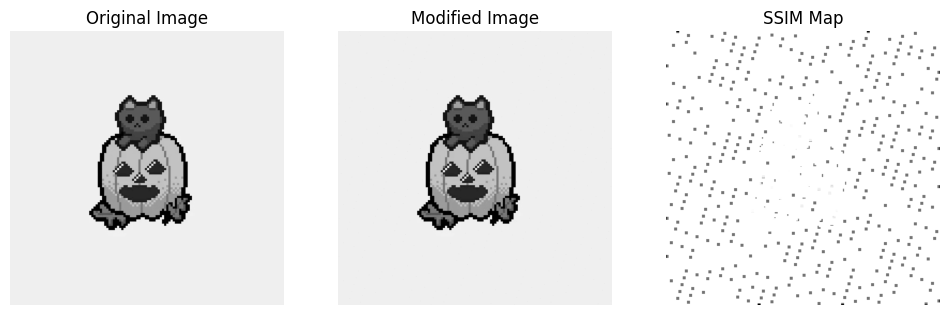

In [34]:
get_calculation_psnr_ssim(test_image, test_image)
get_calculation_psnr_ssim(test_image, modified_image)

# SSBN

In [35]:
def modify_bits(value, bit_positions, bit_values):
    for bit_position, bit_value in zip(bit_positions, bit_values):
        mask = 1 << bit_position
        value &= ~mask  # Clear the bit at bit_position
        if bit_value:
            value |= mask  # Set the bit if bit_value is 1
    return value

def embed_message(image_path, message, password, N):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    pixels = np.array(image)
    h, w = pixels.shape
    l_c = h * w
    l_m = len(message)
    E_l = l_c // l_m

    # Divide the image into regions and calculate central pixels
    regions = [(i * E_l, (i + 1) * E_l) for i in range(l_m)]

    # Seed the PRNG with the password
    random.seed(password)
    random_regions = random.sample(regions, l_m)

    for i in range(0, len(message), N):
        bits = message[i:i+N]
        start, end = random_regions[i // N]
        central_pixel_index = (start + end) // 2
        y, x = divmod(central_pixel_index, w)

        # Modify the N LSBs of the central pixel
        original_value = pixels[y, x]
        bit_positions = list(range(N))  # Bit positions to modify
        bit_values = [int(bit) for bit in bits]
        new_value = modify_bits(original_value, bit_positions, bit_values)
        pixels[y, x] = new_value

    # Save the modified image
    modified_image = Image.fromarray(pixels)
    modified_image.save('modified_ssbn' + image_path.split('/')[-1])

# Example usage
message = binary_message
password = "DQqpiafIpMHsydX"
N = 6  # Number of bits to modify per pixel
embed_message('/content/test_test.png', message, password, N)


In [36]:
def extract_bits(value, bit_positions):
    return [((value >> bit_position) & 1) for bit_position in bit_positions]

def decrypt_message(image_path, password, message_length, N):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    pixels = np.array(image)
    h, w = pixels.shape
    l_c = h * w
    l_m = message_length
    E_l = l_c // l_m

    # Divide the image into regions and calculate central pixels
    regions = [(i * E_l, (i + 1) * E_l) for i in range(l_m)]

    # Seed the PRNG with the password
    random.seed(password)
    random_regions = random.sample(regions, l_m // N)

    extracted_bits = []
    for start, end in random_regions:
        central_pixel_index = (start + end) // 2
        y, x = divmod(central_pixel_index, w)

        # Extract the N LSBs of the central pixel
        pixel_value = pixels[y, x]
        bit_positions = list(range(N))
        bits = extract_bits(pixel_value, bit_positions)
        extracted_bits.extend(bits)

    # Combine extracted bits to reconstruct the message
    message = ''.join(map(str, extracted_bits[:message_length]))
    return message

# Example usage
password = "DQqpiafIpMHsydX"
message_length = len(binary_message)
N = 6
extracted_message = decrypt_message('/content/modified_ssbntest_test.png', password, message_length, N)
converted_message = binary_to_message(extracted_message)
print("Extracted Message (binary):", extracted_message)
print("Original Message: ", converted_message)

Extracted Message (binary): 010101000110010101110011011101000010000001101111011001100010000001100001001000000110110001101111011011100110011100100000011011010110010101110011011100110110000101100111011001010010000001101000011101000111010001110000011100110011101000101111001011110111011101110111011101110010111001110010011001010111001101100101011000010111001001100011011010000110011101100001011101000110010100101110011011100110010101110100001011110111000001110101011000100110110001101001011000110110000101110100011010010110111101101110001011110011001000111000001101100011000000110110001110010011010100110010001100010101111101000001011011100101111101100001011000110111010001101001011101100110010101011111011100110111010001100101011001110110000101101110011011110110011101110010011000010111000001101000011010010110001101011111011100110110001101101000011001010110110101100101010111110111010101110011011010010110111001100111010111110101001101010011010000
Original Message:  Test of a long message https://www

In [37]:
modified_ssbn_image = load_single_image('/content/modified_ssbntest_test.png')

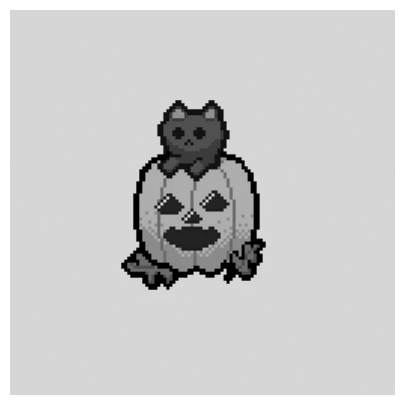

In [38]:
display_single_image(modified_ssbn_image)

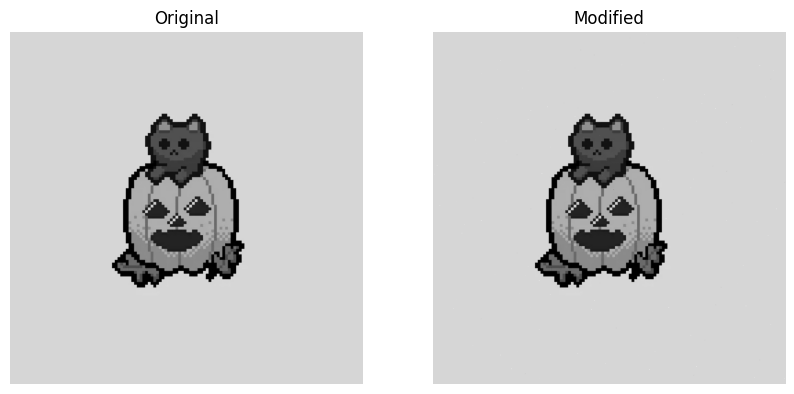

In [39]:
compare_images([test_image, modified_ssbn_image], titles=['Original', 'Modified'])

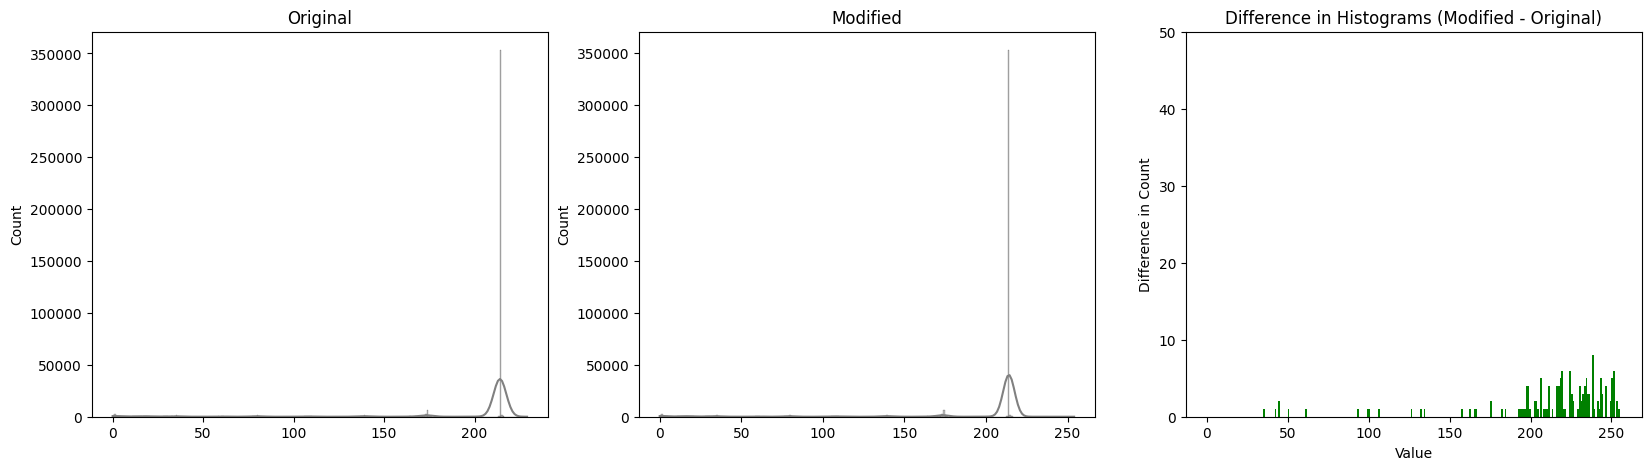

In [40]:
compare_histograms([test_image, modified_ssbn_image], titles=['Original', 'Modified'])

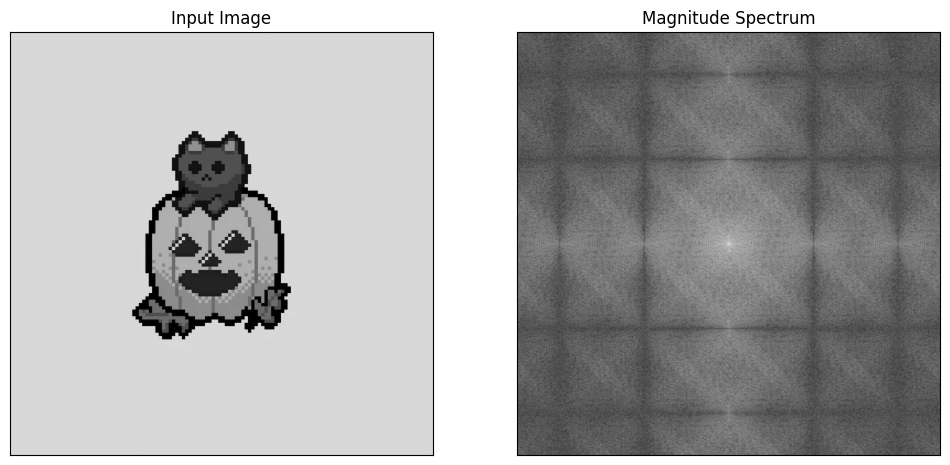

In [41]:
frequency_domain_analysis_single(modified_ssbn_image)

PSNR: 63.41114313818857 dB
SSIM: 0.9979614397140305


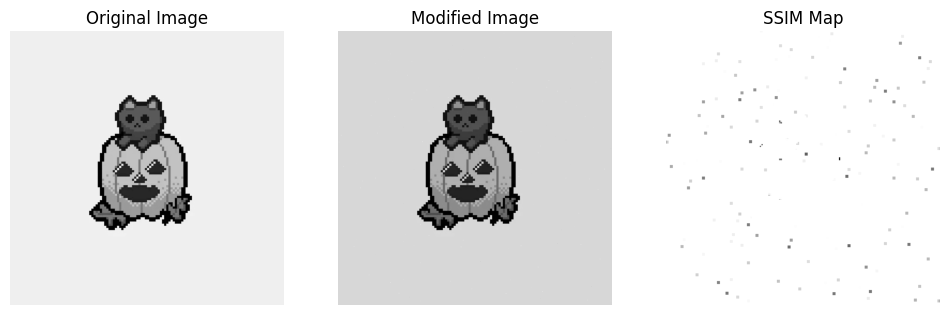

In [42]:
get_calculation_psnr_ssim(test_image, modified_ssbn_image)

In [43]:
def bitplanes(image):
    # im = Image.open(im)
    # data = np.array(im)
    out = []
    # create an image for each k bit plane
    for k in range(7, -1, -1):
        # extract kth bit (from 0 to 7)
        res = image // 2 ** k & 1
        out.append(res * 255)
    # stack generated images
    b = np.hstack(out)
    return Image.fromarray(b)

In [44]:
bit_plane = bitplanes(modified_image)

In [45]:
def show_image(image_array, gray=True):
    if gray:
        # Exibir a imagem em escala de cinza
        plt.imshow(image_array, cmap="gray")
    else:
        plt.imshow(image_array)
    plt.axis('off')  # Desativar os eixos
    plt.show()

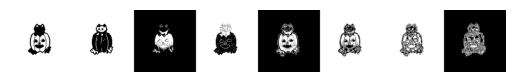

In [46]:
show_image(bit_plane)

In [53]:
def bit_plane_slicing(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    pixels = np.array(image)

    bit_planes = []
    for bit in range(8):  # 8 bit-planes for an 8-bit grayscale image
        bit_plane = (pixels >> bit) & 1  # Extract the bit-plane
        bit_planes.append(bit_plane * 255)  # Scale to 0-255 for visualization

    return bit_planes

def plot_bit_planes(bit_planes, image_title):
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    fig.suptitle(image_title)
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(bit_planes[7-i], cmap='gray')
        ax.set_title(f'Bit-plane {i+1}')
        ax.axis('off')
    plt.show()

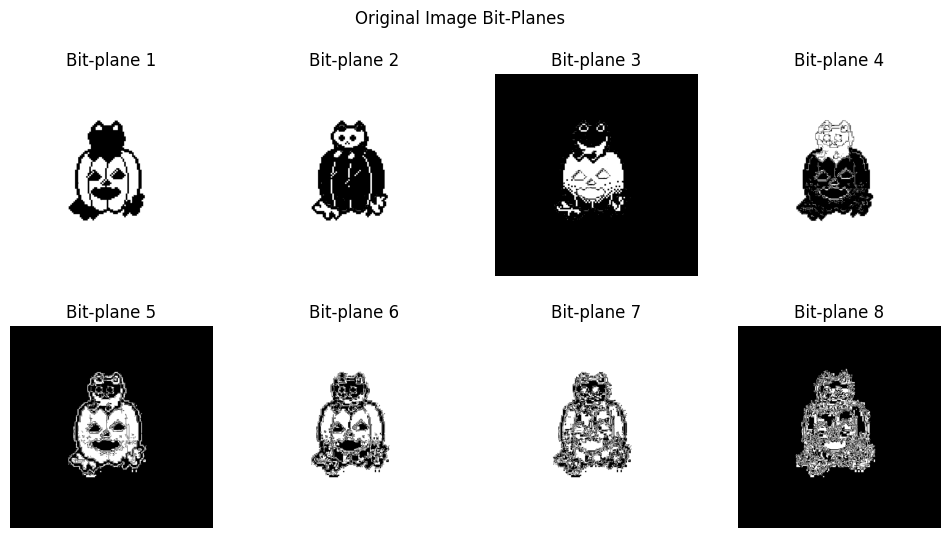

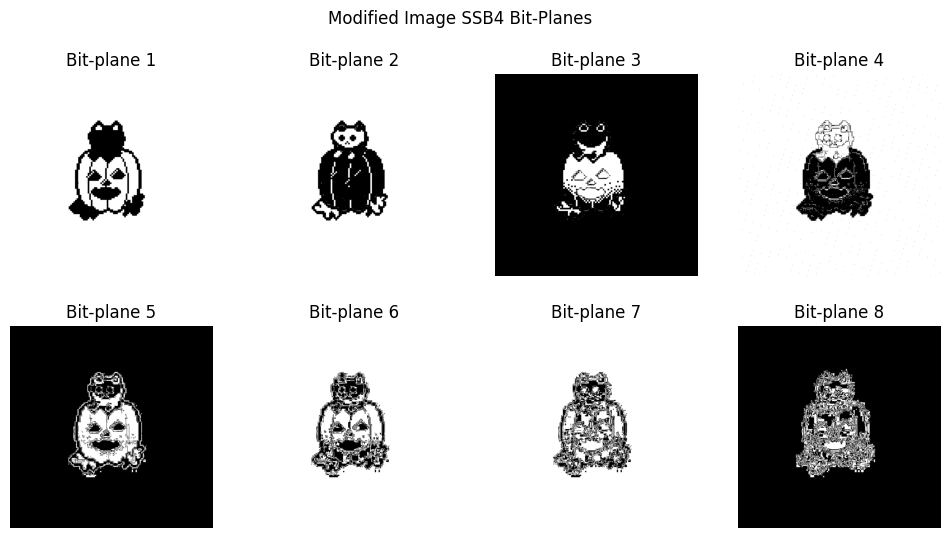

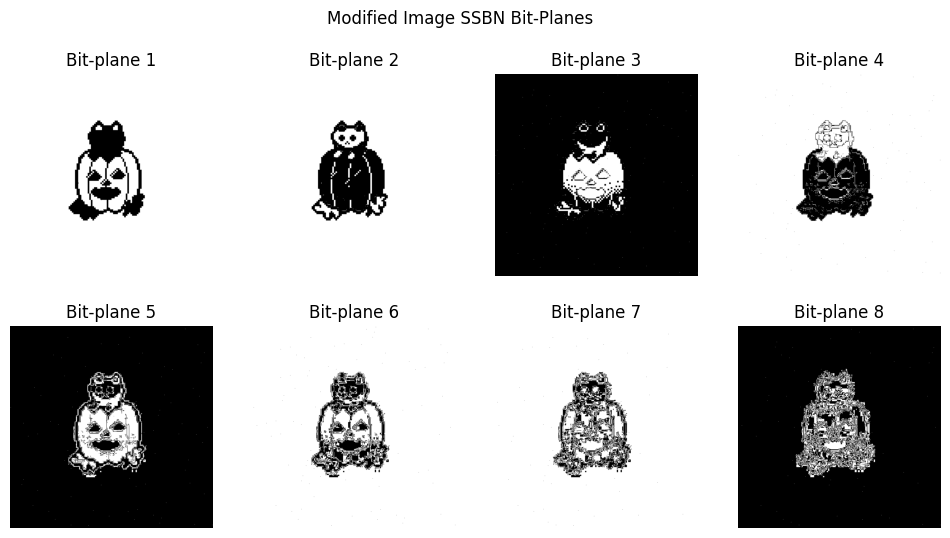

In [54]:
original_image_path = '/content/test_test.png'
modified_image_path = '/content/modified_test_test.png'
modified_image_path_ssbn = '/content/modified_ssbntest_test.png'

# Bit-plane slicing for original image
original_bit_planes = bit_plane_slicing(original_image_path)
plot_bit_planes(original_bit_planes, 'Original Image Bit-Planes')

# Bit-plane slicing for modified image
modified_bit_planes = bit_plane_slicing(modified_image_path)
plot_bit_planes(modified_bit_planes, 'Modified Image SSB4 Bit-Planes')

modified_bit_planes_ssbn = bit_plane_slicing(modified_image_path_ssbn)
plot_bit_planes(modified_bit_planes_ssbn, 'Modified Image SSBN Bit-Planes')

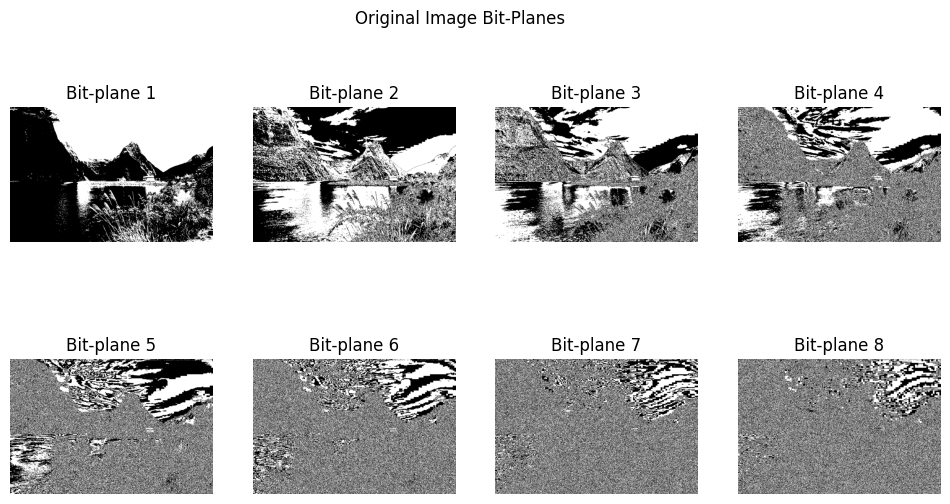

In [55]:
original_image_path = '/content/0.png'
original_bit_planes = bit_plane_slicing(original_image_path)
plot_bit_planes(original_bit_planes, 'Original Image Bit-Planes')

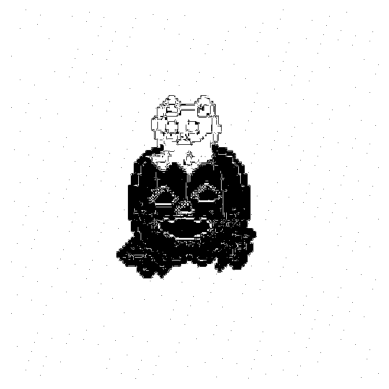

In [59]:
show_image(modified_bit_planes[4])

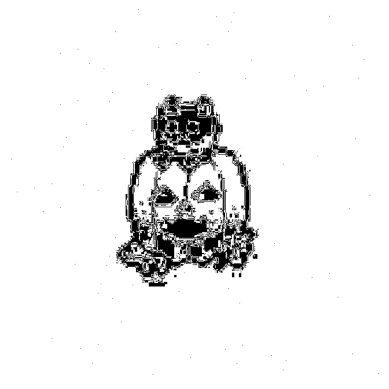

In [62]:
show_image(modified_bit_planes_ssbn[2])